In [1]:
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
import csv

In [3]:
#files = ['feed_forward.txt','rnn.txt','rnn_lstm.txt']
files = ['rnn_lstm.txt','a3c.txt','feed_forward.txt']
labels = ['DRQL+GameFeatures','A3C','DQN']

In [4]:
def read_file(f):
    x = []
    y = []
    with open(f) as fp:
        line = fp.readline()
        line = line.strip()
        start_time = line[15:31]
        start_time = datetime.strptime(start_time,'%m/%d/%y  %H:%M:%S')
        print(start_time)
        while line:
            line = line.strip()
            if 'K/D' in line:
                kd = float(line[-5:])
                #print(line[-10:])
                kd_time = line[15:31]
                kd_time = datetime.strptime(kd_time,'%m/%d/%y  %H:%M:%S')
                time_diff = ((kd_time-start_time).total_seconds() )/ 3600 #in hrs
                #print(time_diff)
                x.append(time_diff)
                y.append(kd)
                
            line = fp.readline()
    
    fp.close()
    return x,y
    

2019-06-04 16:37:05
2019-06-11 16:15:41
2019-06-09 13:03:14


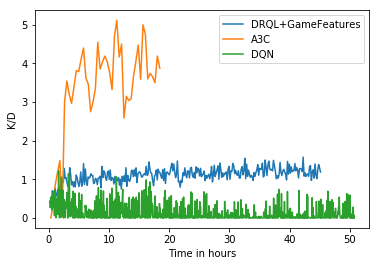

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
i=0
X=[]
Y=[]
for f in files:
    x,y = read_file(f)
    x = x[:-5]
    y = y[:-5]
    
#     print(sum(y[-11:])/11,labels[i])
    ax1.plot(x,y,label=labels[i])
#     zipped = zip(x,y)
#     csvList = [['TIME',labels[i]]]
#     for a,b in zipped:
#         csvList.append([a,b])
    
#     with open('./'+labels[i]+'.csv','w') as csvFile:
#         writer = csv.writer(csvFile)
#         writer.writerows(csvList)
#     csvFile.close()
        
    i+=1

plt.legend(loc='upper right')
plt.xlabel('Time in hours')
plt.ylabel('K/D')
plt.show()